### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

**1. Read in the `coupons.csv` file.**




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
# to see the columns that don't show up in the head() preview above

data.iloc[:,10:16].head()

,has_children,education,occupation,income,car,Bar
0,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
1,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
2,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
3,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
4,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never


**2. Investigate the dataset for missing or problematic data.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

--> The 'car' column is almost entirely missing data; the 5 behavioral questions ("how often do you visit...?") have a small percentage of missing data; everything else is complete.

**3. Decide what to do about your missing data -- drop, replace, other...**

In [7]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

--> This is just a check to see if there's anything worth salvaging in the 'car' column, and there does not appear to be.

**The variables with missing values are all categorical in nature, so I've decided to replace the null values with "Unknown" and simply leave these values out during subsequent evaluations** 

In [30]:
data.fillna('Unknown',inplace=True)
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

**4. What proportion of the total observations chose to accept the coupon?** 



In [10]:
data['Y'].value_counts(normalize=True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

**5. Use a bar plot to visualize the `coupon` column.**

Text(0.5, 1.0, 'Frequencies of Coupon Types')

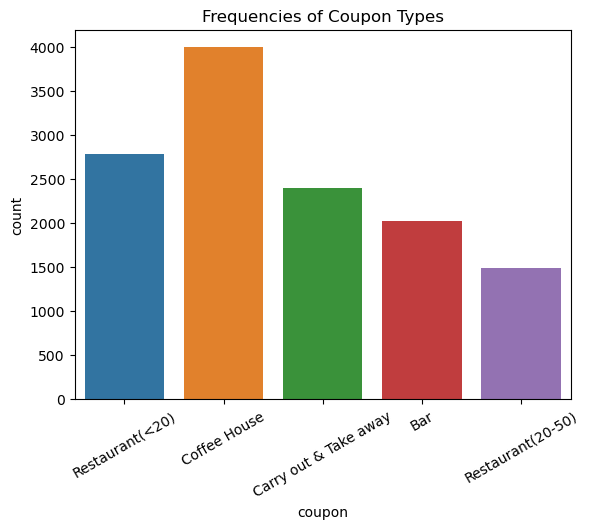

In [141]:
sns.countplot(data=data, x='coupon')
plt.xticks(rotation=30)
plt.title('Frequencies of Coupon Types')

**6. Use a histogram to visualize the temperature column.**

Text(0.5, 1.0, 'Temperatures at Time of Coupon Delivery')

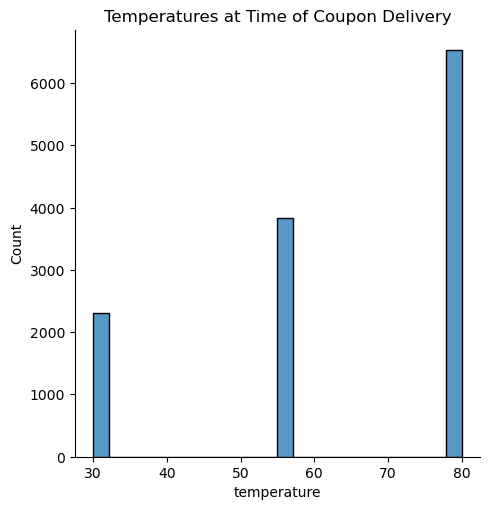

In [142]:
sns.displot(data=data,x='temperature')
plt.title('Temperatures at Time of Coupon Delivery')

**Here's a histogram to visualize the age column as well:**

In [21]:
# Putting the age categories, which are object type, in order

age_order = {'below21':0, '21':1, '26':2, '31':3, '36':4, '41':5, '46':6, '50plus':7}
data1 = data['age'].sort_values(key=lambda x: x.map(age_order))

Text(0.5, 1.0, 'Age of Coupon Recipients')

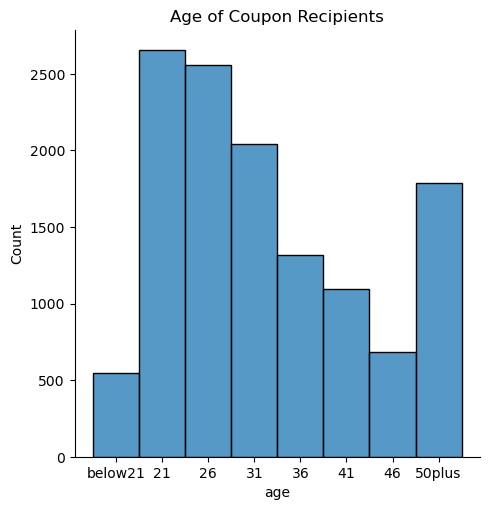

In [143]:
sns.displot(data=data, x=data1)
plt.title('Age of Coupon Recipients')

--> The age distribution is bimodal (due to the large catch-all category (50+) at the end).

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [34]:
data_bar_coupons = data[data['coupon']=='Bar']

**2. What proportion of bar coupons were accepted?**


In [88]:
bar_accept = len(data_bar_coupons[data_bar_coupons['Y']==1]) / len(data_bar_coupons)
print('Proportion of bar coupons accepted = ' + str(round(bar_accept,2)))

Proportion of bar coupons accepted = 0.41


**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [89]:
low_bar = data_bar_coupons[data_bar_coupons['Bar'].isin(['never','less1','1~3'])]
high_bar = data_bar_coupons[data_bar_coupons['Bar'].isin(['4~8','gt8'])]
lb_accept = len(low_bar[low_bar['Y']==1]) / len(low_bar)
hb_accept = len(high_bar[high_bar['Y']==1]) / len(high_bar)
print('Acceptance rate for 3 or fewer bar visits per month = ' + str(round(lb_accept,2)) + '\nAcceptance rate for 4 or more bar visits per month = ' + str(round(hb_accept,2)))

Acceptance rate for 3 or fewer bar visits per month = 0.37
Acceptance rate for 4 or more bar visits per month = 0.77


--> Those who go to bars relatively frequently are clearly more likely to accept the bar coupon. 

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [90]:
one_plus_bar = data_bar_coupons[data_bar_coupons['Bar'].isin(['1~3','4~8','gt8'])]
one_plus_bar_over_25 = one_plus_bar[~one_plus_bar['age'].isin(['below21','21'])]
one_plus_bar_25_under = one_plus_bar[one_plus_bar['age'].isin(['below21','21'])]
opbo25_accept = len(one_plus_bar_over_25[one_plus_bar_over_25['Y']==1])/len(one_plus_bar_over_25)
opb25u_accept = len(one_plus_bar_25_under[one_plus_bar_25_under['Y']==1])/len(one_plus_bar_25_under)

In [91]:
less_one_bar = data_bar_coupons[data_bar_coupons['Bar'].isin(['never','less1'])]
less_one_bar_over_25 = less_one_bar[~less_one_bar['age'].isin(['below21','21'])]
less_one_bar_25_under = less_one_bar[less_one_bar['age'].isin(['below21','21'])]
lobo25_accept = len(less_one_bar_over_25[less_one_bar_over_25['Y']==1])/len(less_one_bar_over_25)
lob25u_accept = len(less_one_bar_25_under[less_one_bar_25_under['Y']==1])/len(less_one_bar_25_under)
print('Acceptance rate for 1+ bar visits and age over 25 = ' + str(round(opbo25_accept,2)))
print('Acceptance rate for 1+ bar visits and age 25 and under = ' + str(round(opb25u_accept,2)))
print('Acceptance rate for <1 bar visits and age over 25 = ' + str(round(lobo25_accept,2)))
print('Acceptance rate for <1 bar visits and age 25 and under = ' + str(round(lob25u_accept,2)))

Acceptance rate for 1+ bar visits and age over 25 = 0.7
Acceptance rate for 1+ bar visits and age 25 and under = 0.67
Acceptance rate for <1 bar visits and age over 25 = 0.26
Acceptance rate for <1 bar visits and age 25 and under = 0.39


--> There is a very large difference between those who go to a bar at least once per month and those who do not, but age doesn't appear to make much of a difference beyond that.  

**Below are two histograms, one for age and one for frequency of bar visits.**

Text(0.5, 1.0, 'Bar Coupon Acceptance by Age')

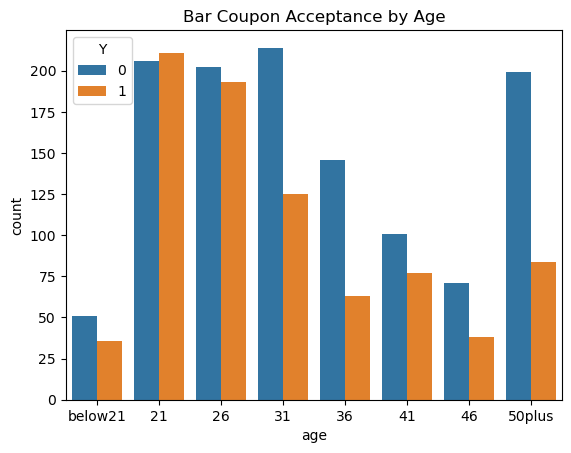

In [147]:
# Putting the age categories, which are object type, in order
age_order = {'below21':0, '21':1, '26':2, '31':3, '36':4, '41':5, '46':6, '50plus':7}
data2 = data_bar_coupons['age'].sort_values(key=lambda x: x.map(age_order))

sns.countplot(data=data_bar_coupons,x=data2,hue='Y')
plt.title('Bar Coupon Acceptance by Age')

--> Younger people appear to be more likely to accept bar coupons, but this is almost surely because that age group is more likely to visit bars regularly.

Text(0.5, 1.0, 'Bar Coupon Acceptance by Frequency of Bar Visits')

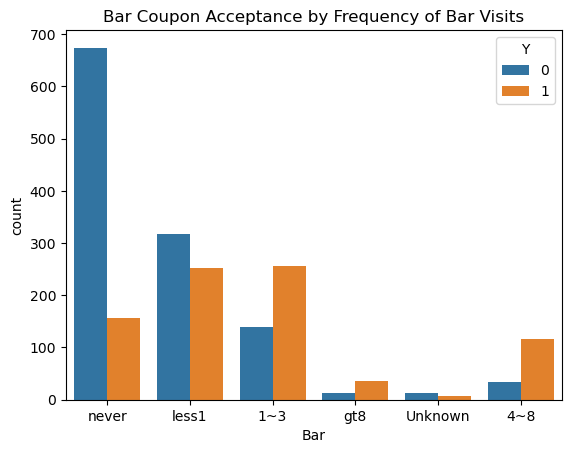

In [146]:
sns.countplot(data=data_bar_coupons,x='Bar',hue='Y')
plt.title('Bar Coupon Acceptance by Frequency of Bar Visits')

--> It can be seen here that there is a dramatic difference between those who go to bars at least once per month and those who do not. 

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


In [102]:
one_plus_bar_no_kid_no_farming_etc = one_plus_bar[(one_plus_bar['passanger'] != 'Kid(s)') & (one_plus_bar['occupation'] != 'Farming Fishing & Forestry')]
opbnknfe_accept = len(one_plus_bar_no_kid_no_farming_etc[one_plus_bar_no_kid_no_farming_etc['Y']==1])/len(one_plus_bar_no_kid_no_farming_etc)
print('Acceptance rate for 1+ bar visits with no kid as passenger and no farming/fishing/forestry = ' + str(round(opbnknfe_accept,2)))

Acceptance rate for 1+ bar visits with no kid as passenger and no farming/fishing/forestry = 0.71


--> Neither of the additional conditions appear to make much difference beyond visiting a bar at least once per month. (In fact, nobody who works in farming/fishing/forestry visits a bar at least once per month, so adding that last condition makes no difference whatsoever). 

**6. Compare the acceptance rates between those drivers who:**

**- go to bars more than once a month, had passengers that were not a kid, and were not widowed** **OR**

**- go to bars more than once a month and are under the age of 30** **OR**

**- go to cheap restaurants more than 4 times a month and income is less than 50K.** 



In [114]:
one_plus_bar_no_kid_not_widowed = one_plus_bar[(one_plus_bar['passanger'] != 'Kid(s)') & (one_plus_bar['maritalStatus'] != 'Widowed')]
opbnknw_accept = len(one_plus_bar_no_kid_not_widowed[one_plus_bar_no_kid_not_widowed['Y']==1])/len(one_plus_bar_no_kid_not_widowed)
print('Acceptance rate for 1+ bar visits with no kid as passenger and not widowed = ' + str(round(opbnknw_accept,2)))

one_plus_bar_30_under = one_plus_bar[one_plus_bar['age'].isin(['below21','21','26'])]
opb30u_accept = len(one_plus_bar_30_under[one_plus_bar_30_under['Y']==1])/len(one_plus_bar_30_under)
print('Acceptance rate for 1+ bar visits and age 30 and under = ' + str(round(opb30u_accept,2)))

one_plus_bar_prime_age = one_plus_bar[one_plus_bar['age'].isin(['21','26'])]
opbpa_accept = len(one_plus_bar_prime_age[one_plus_bar_prime_age['Y']==1])/len(one_plus_bar_prime_age)
print('Acceptance rate for 1+ bar visits and age 21-30 = ' + str(round(opbpa_accept,2)))

cheap_restaurants_low_income = data_bar_coupons[(data_bar_coupons['income'].isin([
            'Less than $12500','$12500 - $24999', '$25000 - $37499','$37500 - $49999'])) & 
                                                (data_bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8']))]
crli_accept = len(cheap_restaurants_low_income[cheap_restaurants_low_income['Y']==1])/len(cheap_restaurants_low_income)
print('Acceptance rate for 4+ cheap restaurant visits and income under $50,000 = ' + str(round(crli_accept,2)))

Acceptance rate for 1+ bar visits with no kid as passenger and not widowed = 0.71
Acceptance rate for 1+ bar visits and age 30 and under = 0.72
Acceptance rate for 1+ bar visits and age 21-30 = 0.73
Acceptance rate for 4+ cheap restaurant visits and income under $50,000 = 0.45


--> Again, the widowing condition made no difference at all (since nobody met the first condition and was widowed). The last set of conditions is back to very close to the overall proportion, so those categories do not appear to be predictive.

**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

From what can be seen here, by far the most important factor associated with accepting bar coupons is visiting a bar somewhat regularly - at least once per month, with increased likelihood if it's at least 4 times per month. There may be a slight association with age as well - with the highest likelihood in the 21-30 age group - but there is a high probability that the age effect is captured by the behavioral condition (i.e. frequency of bar visits). 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigation: Carry Out & Take Away coupons**

What factors, if any, are associated with the acceptance of this sort of coupon?

First, some basic baseline information:

In [7]:
data_carry_out_coupons = data[data['coupon']=='Carry out & Take away']
print('Total number of carry out & take away coupons = ' + str(len(data_carry_out_coupons)))

Total number of carry out & take away coupons = 2393


In [8]:
carry_out_accept = len(data_carry_out_coupons[data_carry_out_coupons['Y']==1]) / len(data_carry_out_coupons)
print('Overall proportion of carry out & take away coupons accepted = ' + str(round(carry_out_accept,2)))

Overall proportion of carry out & take away coupons accepted = 0.74


This is a quite high acceptace rate! In what follows, I will consider a number of factors that could be positively associated with acceptance of this sort of coupon, potentially allowing for an even higher acceptance rate if the coupons were to be targeted accordingly.  

#### - Coupon acceptance and age:

Text(0.5, 0, 'Age')

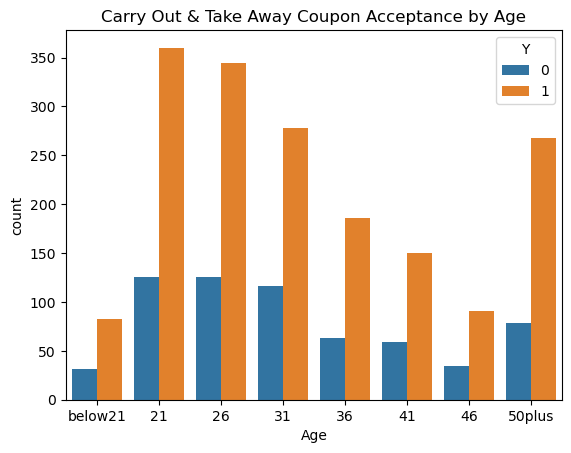

In [171]:
# Putting the age categories, which are object type, in order
age_order = {'below21':0, '21':1, '26':2, '31':3, '36':4, '41':5, '46':6, '50plus':7}
data3 = data_carry_out_coupons['age'].sort_values(key=lambda x: x.map(age_order))

sns.countplot(data=data_carry_out_coupons, x=data3, hue='Y')
plt.title("Carry Out & Take Away Coupon Acceptance by Age")
plt.xlabel('Age')

In [127]:
prime_age = data_carry_out_coupons[data_carry_out_coupons['age'].isin(['21','26','50plus'])]
non_prime_age = data_carry_out_coupons[~data_carry_out_coupons['age'].isin(['21','26','50plus'])]
pa_accept = len(prime_age[prime_age['Y']==1]) / len(prime_age)
npa_accept = len(non_prime_age[non_prime_age['Y']==1]) / len(non_prime_age)
print('Acceptance rate for prime age groups (21, 26, or 50plus) = ' + str(round(pa_accept,2)))
print('Acceptance rate for other age groups = ' + str(round(npa_accept,2)))

Acceptance rate for prime age groups (21, 26, or 50plus) = 0.75
Acceptance rate for other age groups = 0.72


--> Age is only mildly associated with acceptance of this type of coupon (and that association appears to be bimodal).

#### - Coupon acceptance and income:

Text(0.5, 0, 'Income')

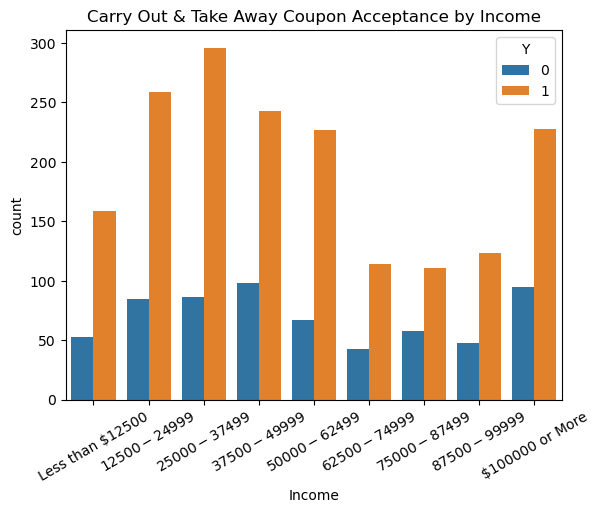

In [170]:
# Putting the income categories, which are object type, in order
income_order = {'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5, '$75000 - $87499':6, '$87500 - $99999':7, '$100000 or More':8}
data4 = data_carry_out_coupons['income'].sort_values(key=lambda x: x.map(income_order))

sns.countplot(data=data_carry_out_coupons, x=data4, hue='Y')
plt.xticks(rotation=30)
plt.title('Carry Out & Take Away Coupon Acceptance by Income')
plt.xlabel('Income')

In [17]:
prime_income = data_carry_out_coupons[data_carry_out_coupons['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'])]
non_prime_income = data_carry_out_coupons[~data_carry_out_coupons['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'])]
pi_accept = len(prime_income[prime_income['Y']==1]) / len(prime_income)
npi_accept = len(non_prime_income[non_prime_income['Y']==1]) / len(non_prime_income)
print('Acceptance rate for prime income groups ($12500 - $62499) = ' + str(round(pi_accept,2)))
print('Acceptance rate for other income groups = ' + str(round(npi_accept,2)))

Acceptance rate for prime income groups ($12500 - $62499) = 0.75
Acceptance rate for other income groups = 0.71


--> Income is only mildly associated with acceptance of this type of coupon (with low to low-middle incomes more likely to accept). 

#### - Coupon acceptance and gender:

Text(0.5, 0, 'Gender')

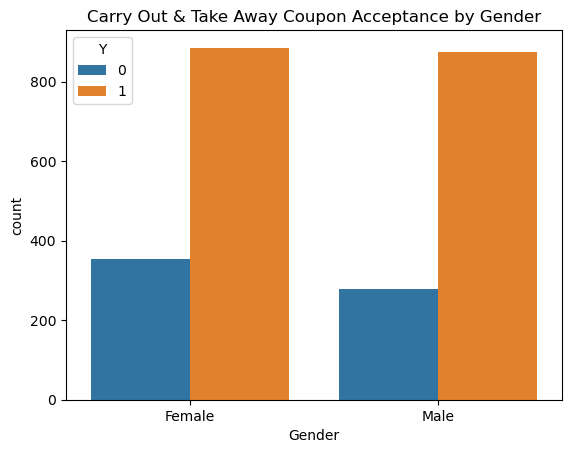

In [169]:
sns.countplot(data=data_carry_out_coupons, x='gender', hue='Y')
plt.title('Carry Out & Take Away Coupon Acceptance by Gender')
plt.xlabel('Gender')

In [15]:
female = data_carry_out_coupons[data_carry_out_coupons['gender']=='Female']
male = data_carry_out_coupons[data_carry_out_coupons['gender']=='Male']
female_accept = len(female[female['Y']==1]) / len(female)
male_accept = len(male[male['Y']==1]) / len(male)
print('Acceptance rate for females = ' + str(round(female_accept,2)))
print('Acceptance rate for males = ' + str(round(male_accept,2)))

Acceptance rate for females = 0.71
Acceptance rate for males = 0.76


--> Gender is only mildly associated with acceptance of this type of coupon (with males more likely to accept than females). 

#### - Coupon acceptance and general carry out behavior:

Text(0.5, 0, 'General Carry Out Behavior')

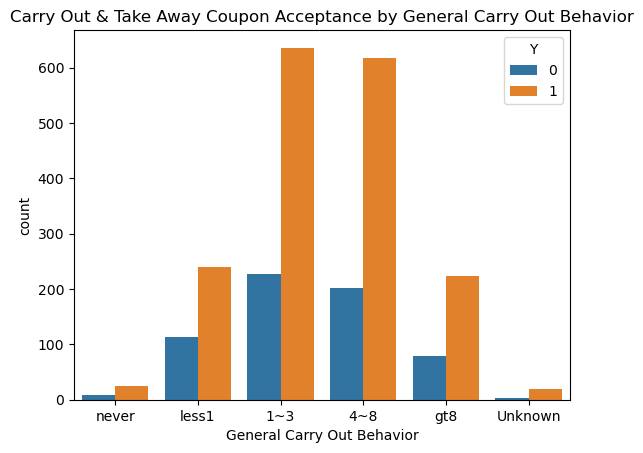

In [168]:
# Putting the carry out behavior categories, which are object type, in order
carry_out_order = {'never':0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4, 'Unknown':5}
data5 = data_carry_out_coupons['CarryAway'].sort_values(key=lambda x: x.map(carry_out_order))

sns.countplot(data=data_carry_out_coupons, x=data5, hue='Y')
plt.title('Carry Out & Take Away Coupon Acceptance by General Carry Out Behavior')
plt.xlabel('General Carry Out Behavior')

In [8]:
one_plus_carry = data_carry_out_coupons[data_carry_out_coupons['CarryAway'].isin(['1~3','4~8','gt8'])]
less_one_carry = data_carry_out_coupons[~data_carry_out_coupons['CarryAway'].isin(['1~3','4~8','gt8'])]
opc_accept = len(one_plus_carry[one_plus_carry['Y']==1]) / len(one_plus_carry)
loc_accept = len(less_one_carry[less_one_carry['Y']==1]) / len(less_one_carry)
print('Acceptance rate for 1+ carry outs per month = ' + str(round(opc_accept,2)))
print('Acceptance rate for less than one carry out per month = ' + str(round(loc_accept,2)))

Acceptance rate for 1+ carry outs per month = 0.74
Acceptance rate for less than one carry out per month = 0.7


--> General carry out behavior is only mildly associated with acceptance of this type of coupon (with those who get carry-out at least once per month more likely to accept).

#### - Coupon acceptance and coupon expiration:

Text(0.5, 0, 'Coupon Expiration')

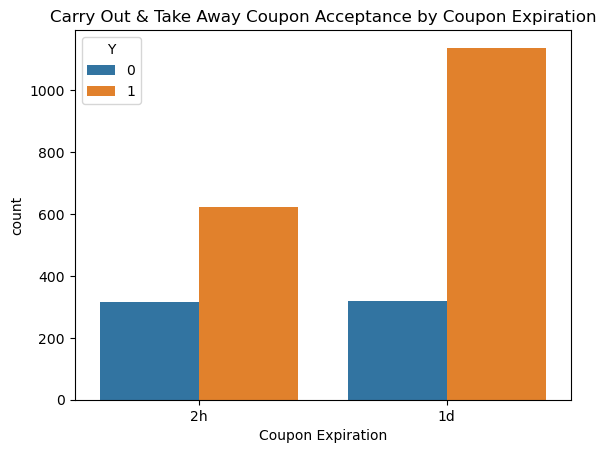

In [167]:
sns.countplot(data=data_carry_out_coupons, x='expiration', hue='Y')
plt.title('Carry Out & Take Away Coupon Acceptance by Coupon Expiration')
plt.xlabel('Coupon Expiration')

In [129]:
one_day_expiration = data_carry_out_coupons[data_carry_out_coupons['expiration']=='1d']
two_hour_expiration = data_carry_out_coupons[data_carry_out_coupons['expiration']=='2h']
ode_accept = len(one_day_expiration[one_day_expiration['Y']==1]) / len(one_day_expiration)
the_accept = len(two_hour_expiration[two_hour_expiration['Y']==1]) / len(two_hour_expiration)
print('Acceptance rate for one-day expiration = ' + str(round(ode_accept,2)))
print('Acceptance rate for two-hour expiration = ' + str(round(the_accept,2)))

Acceptance rate for one-day expiration = 0.78
Acceptance rate for two-hour expiration = 0.66


--> A coupon's expiration period is **mildly-to-moderately** associated with acceptance of this type of coupon, with one-day expiration accepted more frequently than two-hour expiration. (Note, though, that acceptance of the latter is still quite high).

#### - Coupon acceptance and relation to direction of travel:

/tmp/ipykernel_2596/1137454542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_carry_out_coupons['direction_same'] = data_carry_out_coupons['direction_same'].replace([0],'Different').replace([1],'Same')


Text(0.5, 0, 'Relation to Direction of Travel')

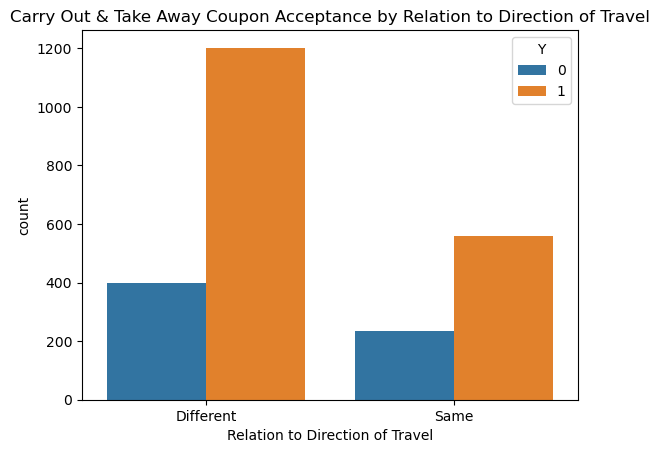

In [19]:
# Change 0s and 1s to 'same' and 'different' for clearer graph labels
data_carry_out_coupons['direction_same'] = data_carry_out_coupons['direction_same'].replace([0],'Different').replace([1],'Same')
sns.countplot(data=data_carry_out_coupons, x='direction_same', hue='Y')
plt.title('Carry Out & Take Away Coupon Acceptance by Relation to Direction of Travel')
plt.xlabel('Relation to Direction of Travel')

In [20]:
same_direction = data_carry_out_coupons[data_carry_out_coupons['direction_same']=='Same']
diff_direction = data_carry_out_coupons[data_carry_out_coupons['direction_same']=='Different']
sd_accept = len(same_direction[same_direction['Y']==1]) / len(same_direction)
dd_accept = len(diff_direction[diff_direction['Y']==1]) / len(diff_direction)
print('Acceptance rate when the direction of travel is the same = ' + str(round(sd_accept,2)))
print('Acceptance rate when the direction of travel is opposite/different = ' + str(round(dd_accept,2)))

Acceptance rate when the direction of travel is the same = 0.7
Acceptance rate when the direction of travel is opposite/different = 0.75


--> The relation to direction of travel is only mildly associated with acceptance of this type of coupon (with coupons for places in the opposite/different direction accepted more frequently).

#### - Coupon acceptance and time of day:

Text(0.5, 0, 'Time of Day')

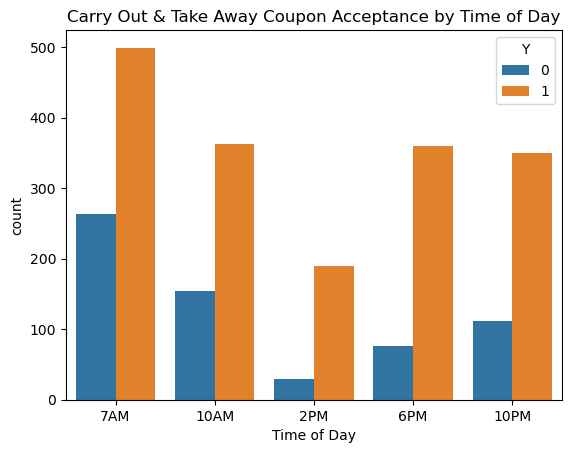

In [166]:
# Putting the time of day categories, which are object type, in order
time_order = {'7AM':0, '10AM':1, '2PM':2, '6PM':3, '10PM':4}
data6 = data_carry_out_coupons['time'].sort_values(key=lambda x: x.map(time_order))

sns.countplot(data=data_carry_out_coupons, x=data6, hue='Y')
plt.title('Carry Out & Take Away Coupon Acceptance by Time of Day')
plt.xlabel('Time of Day')

In [172]:
prime_time = data_carry_out_coupons[data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])]
non_prime_time = data_carry_out_coupons[~data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])]
pt_accept = len(prime_time[prime_time['Y']==1]) / len(prime_time)
npt_accept = len(non_prime_time[non_prime_time['Y']==1]) / len(non_prime_time)
print('Acceptance rate for prime time of day (2pm to 10pm) = ' + str(round(pt_accept,2)))
print('Acceptance rate for other times of day (7am to 10am) = ' + str(round(npt_accept,2)))

Acceptance rate for prime time of day (2pm to 10pm) = 0.81
Acceptance rate for other times of day (7am to 10am) = 0.67


--> The time of sending is **mildly-to-moderately** associated with acceptance of this type of coupon, with coupons sent in the afternoon/evening (2pm, 6pm, or 10pm) accepted more frequently than those sent in the morning (7am or 10am). (Note, though, that acceptance of the latter is still quite high). 

#### The two factors most strongly associated with acceptance of the coupon are (1) time of day and (2) coupon expiration period. These two factors are combined below:

In [131]:
prime_time_one_day_expiration = data_carry_out_coupons[(data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])) & (data_carry_out_coupons['expiration']=='1d')]
non_prime_time_one_day_expiration = data_carry_out_coupons[~((data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])) & (data_carry_out_coupons['expiration']=='1d'))]
ptode_accept = len(prime_time_one_day_expiration[prime_time_one_day_expiration['Y']==1]) / len(prime_time_one_day_expiration)
nptode_accept = len(non_prime_time_one_day_expiration[non_prime_time_one_day_expiration['Y']==1]) / len(non_prime_time_one_day_expiration)
print('Acceptance rate for prime time of day (2pm to 10pm) and one-day expiration = ' + str(round(ptode_accept,2)))
print('Acceptance rate for other times of day and/or two-day expiration = ' + str(round(nptode_accept,2)))

Acceptance rate for prime time of day (2pm to 10pm) and one-day expiration = 0.82
Acceptance rate for other times of day and/or two-day expiration = 0.69


--> This is the highest acceptance rate observed so far, but it is only slightly higher than the rate seen for either prime time of day or one-day expiration alone. My conjecture is that this is because the longer expiration period has a greater effect when the coupon is sent in the morning. This will be explored below. 

In [175]:
prime_time_two_hour_expiration = data_carry_out_coupons[(data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])) & (data_carry_out_coupons['expiration']=='2h')]
ptthe_accept = len(prime_time_two_hour_expiration[prime_time_two_hour_expiration['Y']==1]) / len(prime_time_two_hour_expiration)
print('Acceptance rate for prime time of day (2pm to 10pm) and one-day expiration is ' + str(round(ptode_accept,2))) 
print('Acceptance rate for prime time of day (2pm to 10pm) and two-hour expiration is ' + str(round(ptthe_accept,2)))

Acceptance rate for prime time of day (2pm to 10pm) and one-day expiration is 0.82
Acceptance rate for prime time of day (2pm to 10pm) and two-hour expiration is 0.76


In [177]:
morning_one_day_expiration = data_carry_out_coupons[~(data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])) & (data_carry_out_coupons['expiration']=='1d')]
morning_two_hour_expiration = data_carry_out_coupons[~(data_carry_out_coupons['time'].isin(['2PM','6PM','10PM'])) & (data_carry_out_coupons['expiration']=='2h')]
mode_accept = len(morning_one_day_expiration[morning_one_day_expiration['Y']==1]) / len(morning_one_day_expiration)
mthe_accept = len(morning_two_hour_expiration[morning_two_hour_expiration['Y']==1]) / len(morning_two_hour_expiration)
print('Acceptance rate for morning (7am to 10am) and one-day expiration is ' + str(round(mode_accept,2))) 
print('Acceptance rate for morning (7am to 10am) and two-hour expiration is ' + str(round(mthe_accept,2)))

Acceptance rate for morning (7am to 10am) and one-day expiration is 0.73
Acceptance rate for morning (7am to 10am) and two-hour expiration is 0.62


--> My conjecture is supported: the one-day expiration period seems to make a notably larger difference when the coupons are received in the morning.

#### - Findings:

The primary conclusion of this investigation of Amazon's carry out & take away coupons is quite simple: this sort of coupon is very popular, and that popularity is very widespread. People of all ages, incomes, genders, etc. readily accept this sort of coupon, and it is accepted at high rates regardless of time of day, direction of travel, or the coupon's expiration period. In short, a high rate of acceptance is virtually guaranteed for this sort of coupon.

That said, if the goal is to maximize the acceptance rate, the most promising factors to act upon are (1) the time of day when the coupon is sent and (2) the coupon's expiration period. Other factors that could be taken into account include (in order of promise): (3) gender, (4) direction of travel, (5) income, (6) general carry-out behavior, and (7) age.    

#### - Next steps and recommendations:

In order to maximize the coupon acceptance rate, I would recommend the following:
- Send this sort of coupon primarily in the afternoon/evening (when the acceptance rate is generally >80%).
- Send this sort of coupon primarily with a one-day expiration period - and *always* with a one-day expiration when coupons are sent in the morning hours.

If these two recommendations are followed, the acceptance rate should consistenly be 78% or more.

In addition, it may be worth targeting males and people with low to low-middle incomes (roughly $12,500 - $62,500) - I'd recommend further investigation in both cases. As for the other observed associations (involving direction of travel, general carry-out behavior, and age), I'm inclined to think that they are not robust enough and/or that the likely effects are too small for there to be much value in pursuing them further.    